# Converting a binary mask to a shapefile
## Developement version

This notebook illustrates the conversion of a (segmentation result) binary mask to a shapefile. The example is using a 2006 QuickBird image of Kalyan, India and the binary mask of the slum ground truth.

## Load the mask from disk

Python package imports:

In [1]:
# import
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import rasterio as ras
from rasterio.features import shapes as sh
from satsense.util import load_from_file

Path and filenames:

In [2]:
# data path
MASK_PATH = '/home/elena/DynaSlum/Data/Kalyan/Rasterized_Lourens/'

# mask filename
ext = 'tif'
truth_slum_mask_fname = 'all_slums' + '.' + ext

# mask full filename
truth_slum_mask_fullfname = os.path.join(MASK_PATH, truth_slum_mask_fname)

Load the mask onto a numpy array:

In [3]:
_, truth_slum_mask = load_from_file(truth_slum_mask_fullfname)
print("Truth slum mask shape: ", truth_slum_mask.shape)

Truth slum mask shape:  (6223, 4872, 1)


Squeeze the unnecessary 3rd empty dimension

In [4]:
truth_slum_mask = np.squeeze(truth_slum_mask)
print("Truth slum mask shape: ", truth_slum_mask.shape)

Truth slum mask shape:  (6223, 4872)


Print some slum mask values and visualize it:

Truth slum mask values [20:60,1420:1460]: 
[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]]


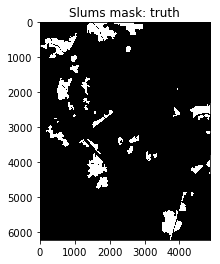

In [5]:
print("Truth slum mask values [20:60,1420:1460]: ")
print(truth_slum_mask[20:60,1420:1460])
#f = plt.subplots(1, 1)
plt.imshow(truth_slum_mask, cmap='gray')
plt.title('Slums mask: truth')

Use rasterio toprint properties:

In [23]:
with ras.drivers():
    with ras.open(truth_slum_mask_fullfname) as src:
        print(src.width, src.height)
        print(src.crs)
        print(src.affine)
        print(src.count)
        print(src.indexes)
        
#with ras.drivers():
#    with ras.open(truth_slum_mask_fullfname) as src:
#        image = src.read()
#        results = (
#        {'properties': {'raster_val': v}, 'geometry': s}
#        for i, (s, v) 
#        in enumerate(
#            sh(image, mask=None, transform=src.affine)))

4872 6223
CRS({})
| 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
1
(1,)


/home/elena/anaconda3/envs/satelite/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


The list of features:

In [21]:
#print(results)
geoms = list(results)
print(len(geoms))
print(geoms)


1
[{'geometry': {'type': 'Polygon', 'coordinates': [[(0.0, 0.0), (0.0, 1.0), (6223.0, 1.0), (6223.0, 0.0), (0.0, 0.0)]]}, 'properties': {'raster_val': 0.0}}]
